# IMT 573 - Lab 6 - Conditional Probability

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Pratiibh Bassi

Collaborators: 

In this module, we have focused on statistical concepts. In this lab, you'll explore the concept of conditional probability using baseball data. Baseball is a bat-and-ball sport played in countries around the world including the United States, Canada, Cuba, the Dominican Republic, and Japan, to name a few. Baseball is a played between two teams who take turns batting and fielding. The objective of the game is to score "runs" by getting on "bases" with either "hits" or "walks". A run is scored when a player advances around the bases and returns to home plate. You can learn more [here](https://en.wikipedia.org/wiki/Baseball).

We will use a dataset of baseball game statistics from 2010-2013. You can learn more about the dataset at www.retrosheet.org/.

### Problem 1: Win probability

If a baseball team scores X runs, what is the probability it will win the game? This is the question we will explore in this lab (adapted from Decision Science News, 2014). 

#### (a) Import data

To begin, load the data found in the `GL2010.TXT`, `GL2011.TXT`, `GL2012.TXT`, `GL2013.TXT` into a single dataframe. You can find column names for the data in the `cnames.txt` file. You should ultimately have 9,720 rows of data.

In [2]:
import pandas as pd
import seaborn as sns

In [8]:
data_files = ['GL2010.TXT', 'GL2011.TXT', 'GL2012.TXT', 'GL2013.TXT']
column_file = 'cnames.txt'

In [10]:
columns = pd.read_csv('cnames.txt')

In [12]:
data = pd.concat(pd.read_csv(d, header = None) for d in data_files)
data.columns = columns.Name

In [14]:
data.describe()

Name,Date,Numberofgame,VisitorGameNum,HomeGameNum,VisitorScore,HomeScore,Outs,Forfeit,Attendance,DurationMinutes,...,132,135,138,141,144,147,150,153,156,159
count,9.720000e+03,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,0.0,9720.000000,9720.000000,...,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,2.011567e+07,0.029938,81.498354,81.501852,4.223765,4.355247,53.654733,NaN,30389.599177,178.950206,...,2.976440,6.918827,6.051646,6.132613,5.675514,5.980864,5.590226,5.305247,4.579835,3.041152
std,1.118093e+04,0.221373,46.757826,46.776302,3.057132,2.968094,5.219094,NaN,10382.410059,27.947016,...,2.514156,1.604698,1.998561,2.502845,2.720747,2.753973,2.511807,2.464635,2.354175,2.567286
min,2.010040e+07,0.000000,1.000000,1.000000,0.000000,0.000000,30.000000,NaN,0.000000,99.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
25%,2.010800e+07,0.000000,41.000000,41.000000,2.000000,2.000000,51.000000,NaN,21842.250000,161.000000,...,1.000000,6.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,2.012033e+07,0.000000,81.000000,82.000000,4.000000,4.000000,54.000000,NaN,31008.500000,175.000000,...,1.000000,7.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,4.000000,1.000000
75%,2.013035e+07,0.000000,122.000000,122.000000,6.000000,6.000000,54.000000,NaN,39016.000000,193.000000,...,5.000000,8.000000,8.000000,9.000000,8.000000,9.000000,8.000000,7.000000,6.000000,6.000000
max,2.013093e+07,2.000000,163.000000,163.000000,21.000000,22.000000,120.000000,NaN,56000.000000,426.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
data.shape

(9720, 161)

In [26]:
data.head()

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,HomeScore,Outs,DayorNight,Completion,Forfeit,Protest,ParkID,Attendance,DurationMinutes,VisitingLineScores,HomeLineScores,Vat-bats,Vhits,Vdoubles,Vtriples,Vhomeruns,VRBI,Vsacrificehits,Vsacrificeflies,Vhit-by-pitch,Vwalks,Vintentionalwalks,Vstrikeouts,Vstolenbases,Vcaughtstealing,Vgroundedintodoubleplays,Vawardedfirstoncatcherinterference,Vleftonbase,Vpitchersused,Vindividualearnedruns,Vteam arnedruns,Vwildpitches,Vbalks,Vputouts,Vassists,Verrors,Vpassed balls,Vdouble plays,Vtriple plays,Hat-bats,Hhits,Hdoubles,Htriples,Hhomeruns,HRBI,Hsacrificehits,Hsacrificeflies,Hhit-by-pitch,Hwalks,Hintentionalwalks,Hstrikeouts,Hstolenbases,Hcaughtstealing,Hgroundedintodoubleplays,Hawardedfirstoncatcherinterference,Hleftonbase,Hpitchersused,Hindividualearnedruns,Hteam arnedruns,Hwildpitches,Hbalks,Hputouts,Hassists,Herrors,Hpassed balls,Hdouble plays,Htriple plays,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,NaN,NaN,NaN,BOS07,37440,226,020300200,01001331x,37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,westj901,Joe West,herna901,Angel Hernandez,schrp901,Paul Schrieber,drakr901,Rob Drake,NaN,(none),NaN,(none),giraj001,Joe Girardi,frant001,Terry Francona,okajh001,Hideki Okajima,parkc002,Chan Ho Park,papej001,Jonathan Papelbon,NaN,(none),sabac001,CC Sabathia,beckj002,Josh Beckett,jeted001,Derek Jeter,6,johnn001,Nick Johnson,10,teixm001,Mark Teixeira,3,rodra001,Alex Rodriguez,5,canor001,Robinson Cano,4,posaj001,Jorge Posada,2,granc001,Curtis Granderson,8,swisn001,Nick Swisher,9,gardb001,Brett Gardner,7,ellsj001,Jacoby Ellsbury,7,pedrd001,Dustin Pedroia,4,martv001,Victor Martinez,2,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,belta001,Adrian Beltre,5,drewj001,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,NaN,NaN,NaN,ANA01,43504,180,020010000,21001002x,32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,mcclt901,Tim McClelland,everm901,Mike Everitt,fleta901,Andy Fletcher,johna901,Adrian Johnson,NaN,(none),NaN,(none),gardr001,Ron Gardenhire,sciom001,Mike Scioscia,weavj003,Jered Weaver,bakes002,Scott Baker,fuenb001,Brian Fuentes,matsh001,Hideki Matsui,bakes002,Scott Baker,weavj003,Jered Weaver,spand001,Denard Span,8,hudso001,Orlando Hudson,4,mauej001,Joe Mauer,2,mornj001,Justin Morneau,3,cuddm001,Michael Cuddyer,9,kubej002,Jason Kubel,10,yound003,Delmon Young,7,hardj003,J.J. Hardy,6,puntn001,Nick Punto,5,aybae001,Erick Aybar,6,abreb001,Bobby Abreu,9,huntt001,Torii Hunter,8,matsh001,Hideki Matsui,10,morak001,Kendrys Morales,3,rivej001,Juan Rivera,7,kendh001,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,NaN,NaN,NaN,CHI12,38935,144,000000000,20201001x,30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,darlg901,Gary Darling,hohnb901,Bill Hohn,drecb901,Bruce Dreckman,estam901,Mike Estabrook,NaN,(none),NaN,(none),actam801,Manny Acta,guilo001,Ozzie Guillen,buehm001,Mark Buehrle,westj001,Jake Westbrook,NaN,(none),konep001,Paul Konerko,westj001,Jake Westbrook,buehm001,Mark Buehrle,cabra002,Asdrubal Cabrera,6,sizeg001,Grady Sizemore,8,choos001,Shin-Soo Choo,9,hafnt001,Travis Hafner,10,peraj001,Jhonny Peralta,5,lapom001,Matt LaPorta,3,grudm001,Mark Grudzielanek,4,marsl001,Lou Marson,2,branm003,Michael Brantley,7,pierj002,Juan Pierre,7,beckg001,Gordon Beckham,4,quenc001,Carlos Quentin,9,konep001,Paul Konerko,3,kotsm0

In [28]:
data.tail()

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,HomeScore,Outs,DayorNight,Completion,Forfeit,Protest,ParkID,Attendance,DurationMinutes,VisitingLineScores,HomeLineScores,Vat-bats,Vhits,Vdoubles,Vtriples,Vhomeruns,VRBI,Vsacrificehits,Vsacrificeflies,Vhit-by-pitch,Vwalks,Vintentionalwalks,Vstrikeouts,Vstolenbases,Vcaughtstealing,Vgroundedintodoubleplays,Vawardedfirstoncatcherinterference,Vleftonbase,Vpitchersused,Vindividualearnedruns,Vteam arnedruns,Vwildpitches,Vbalks,Vputouts,Vassists,Verrors,Vpassed balls,Vdouble plays,Vtriple plays,Hat-bats,Hhits,Hdoubles,Htriples,Hhomeruns,HRBI,Hsacrificehits,Hsacrificeflies,Hhit-by-pitch,Hwalks,Hintentionalwalks,Hstrikeouts,Hstolenbases,Hcaughtstealing,Hgroundedintodoubleplays,Hawardedfirstoncatcherinterference,Hleftonbase,Hpitchersused,Hindividualearnedruns,Hteam arnedruns,Hwildpitches,Hbalks,Hputouts,Hassists,Herrors,Hpassed balls,Hdouble plays,Htriple plays,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
2426,20130929,0,Sun,DET,AL,162,MIA,NL,162,0,1,53,D,NaN,NaN,NaN,MIA02,28315,126,000000000,000000001,28,0,0,0,0,0,0,0,1,1,0,4,0,0,0,0,3,4,1,1,2,0,26,3,1,0,0,0,32,6,0,0,0,0,0,0,0,2,0,13,0,0,0,0,7,1,0,0,0,0,27,12,1,0,0,0,kulpr901,Ron Kulpa,guccc901,Chris Guccione,hallt901,Tom Hallion,barkl901,Lance Barksdale,NaN,(none),NaN,(none),leylj801,Jim Leyland,redmm001,Mike Redmond,alvah001,Henderson Alvarez,putkl001,Luke Putkonen,NaN,(none),NaN,(none),verlj001,Justin Verlander,alvah001,Henderson Alvarez,kelld001,Don Kelly,8,dirka001,Andy Dirks,9,fielp001,Prince Fielder,3,peraj001,Jhonny Peralta,7,infao001,Omar Infante,4,penab002,Brayan Pena,2,iglej001,Jose Iglesias,6,santr002,Ramon Santiago,5,verlj001,Justin Verlander,1,pierj002,Juan Pierre,7,lucae001,Ed Lucas,4,ruggj001,Justin Ruggiano,8,stanm004,Giancarlo Stanton,9,morrl001,Logan Morrison,3,hecha001,Adeiny Hechavarria,6,coghc001,Chris Coghlan,5,hillk002,Koyie Hill,2,alvah001,Henderson Alvarez,1,NaN,Y
2427,20130929,0,Sun,MIL,NL,162,NYN,NL,162,2,3,51,D,NaN,NaN,NaN,NYC20,41891,143,000200000,10000002x,30,6,0,0,0,2,0,0,0,3,0,6,1,0,1,0,4,2,1,1,0,0,24,4,2,0,0,0,27,3,0,0,0,2,1,1,0,0,0,8,3,0,0,0,2,4,2,2,0,0,27,13,1,0,1,0,reybd901,D.J. Reyburn,buckc901,CB Bucknor,scotd901,Dale Scott,ticht901,Todd Tichenor,NaN,(none),NaN,(none),roenr001,Ron Roenicke,collt801,Terry Collins,blacv001,Vic Black,kintb001,Brandon Kintzler,franf001,Frank Francisco,youne003,Eric Young,estrm001,Marco Estrada,niesj001,Jonathon Niese,aokin001,Norichika Aoki,9,bianj001,Jeff Bianchi,6,lucrj001,Jonathan Lucroy,2,gomec002,Carlos Gomez,8,betay001,Yuniesky Betancourt,5,halts002,Sean Halton,3,schal001,Logan Schafer,7,genns001,Scooter Gennett,4,estrm001,Marco Estrada,1,youne003,Eric Young,7,dudal001,Lucas Duda,3,wrigd002,David Wright,5,murpd006,Dan Murphy,4,baxtm001,Mike Baxter,9,lagaj001,Juan Lagares,8,centj001,Juan Centeno,2,tovaw001,Wilfredo Tovar,6,niesj001,Jonathon Niese,1,NaN,Y
2428,20130929,0,Sun,SDN,NL,162,SFN,NL,162,6,7,51,D,NaN,NaN,NaN,SFO03,41495,197,001140000,100110202,33,7,2,1,2,6,0,0,0,4,0,8,0,1,1,0,4,5,7,7,1,0,24,12,1,1,1,0,34,11,3,0,1,7,0,0,2,5,1,8,1,0,1,0,10,6,6,6,1,0,27,9,1,0,2,0,wolcq901,Quinn Wolcott,fleta901,Andy Fletcher,drakr901,Rob Drake,westj901,Joe West,NaN,(none),NaN,(none),blacb001,Buddy Black,bochb002,Bruce Bochy,romos001,Sergio Romo,streh001,Huston Street,NaN,(none),pench001,Hunter Pence,rosst001,Tyson Ross,moscg001,Guillermo Moscoso,denoc001,Chris Denorfia,8,guzmj005,Jesus Guzman,7,gyorj001,Jedd Gyorko,4,headc001,Chase Headley,5,medit001,Tommy Medica,3,kotsm001,Mark Kotsay,9,hundn001,Nick Hundley,2,amara001,Alexi Amarista,6,rosst001,Tyson Ross,1,blang001,Gregor Blanco,8,abret001,Tony Abreu,4,beltb001,Brandon Belt,3,poseb001,Buster Posey,2,pench00

In [22]:
pd.set_option('display.max_columns', None)

In [24]:
pd.set_option('display.max_rows', None)

In [30]:
data.isna().sum()

Name
Date                                     0
Numberofgame                             0
Day                                      0
Visitor                                  0
VisitorLeague                            0
VisitorGameNum                           0
Home                                     0
HomeLeague                               0
HomeGameNum                              0
VisitorScore                             0
HomeScore                                0
Outs                                     0
DayorNight                               0
Completion                            9715
Forfeit                               9720
Protest                               9715
ParkID                                   0
Attendance                               0
DurationMinutes                          0
VisitingLineScores                       0
HomeLineScores                           0
Vat-bats                                 0
Vhits                                    0
Vdoubl

In [32]:
data.columns

Index(['Date', 'Numberofgame', 'Day', 'Visitor', 'VisitorLeague',
       'VisitorGameNum', 'Home', 'HomeLeague', 'HomeGameNum', 'VisitorScore',
       ...
       '152', '153', '154', '155', '156', '157', '158', '159', '160', '161'],
      dtype='object', name='Name', length=161)

#### (b) Calculate conditional probability

Considering only games between two teams in the National League (NL), compute the conditional probability of the team winning given X runs scored, for X = 0 to 10. Do this separately for Home and Visitor teams.

In [34]:
data.head()

Name,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,HomeScore,Outs,DayorNight,Completion,Forfeit,Protest,ParkID,Attendance,DurationMinutes,VisitingLineScores,HomeLineScores,Vat-bats,Vhits,Vdoubles,Vtriples,Vhomeruns,VRBI,Vsacrificehits,Vsacrificeflies,Vhit-by-pitch,Vwalks,Vintentionalwalks,Vstrikeouts,Vstolenbases,Vcaughtstealing,Vgroundedintodoubleplays,Vawardedfirstoncatcherinterference,Vleftonbase,Vpitchersused,Vindividualearnedruns,Vteam arnedruns,Vwildpitches,Vbalks,Vputouts,Vassists,Verrors,Vpassed balls,Vdouble plays,Vtriple plays,Hat-bats,Hhits,Hdoubles,Htriples,Hhomeruns,HRBI,Hsacrificehits,Hsacrificeflies,Hhit-by-pitch,Hwalks,Hintentionalwalks,Hstrikeouts,Hstolenbases,Hcaughtstealing,Hgroundedintodoubleplays,Hawardedfirstoncatcherinterference,Hleftonbase,Hpitchersused,Hindividualearnedruns,Hteam arnedruns,Hwildpitches,Hbalks,Hputouts,Hassists,Herrors,Hpassed balls,Hdouble plays,Htriple plays,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,NaN,NaN,NaN,BOS07,37440,226,020300200,01001331x,37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,westj901,Joe West,herna901,Angel Hernandez,schrp901,Paul Schrieber,drakr901,Rob Drake,NaN,(none),NaN,(none),giraj001,Joe Girardi,frant001,Terry Francona,okajh001,Hideki Okajima,parkc002,Chan Ho Park,papej001,Jonathan Papelbon,NaN,(none),sabac001,CC Sabathia,beckj002,Josh Beckett,jeted001,Derek Jeter,6,johnn001,Nick Johnson,10,teixm001,Mark Teixeira,3,rodra001,Alex Rodriguez,5,canor001,Robinson Cano,4,posaj001,Jorge Posada,2,granc001,Curtis Granderson,8,swisn001,Nick Swisher,9,gardb001,Brett Gardner,7,ellsj001,Jacoby Ellsbury,7,pedrd001,Dustin Pedroia,4,martv001,Victor Martinez,2,youkk001,Kevin Youkilis,3,ortid001,David Ortiz,10,belta001,Adrian Beltre,5,drewj001,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,NaN,NaN,NaN,ANA01,43504,180,020010000,21001002x,32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,mcclt901,Tim McClelland,everm901,Mike Everitt,fleta901,Andy Fletcher,johna901,Adrian Johnson,NaN,(none),NaN,(none),gardr001,Ron Gardenhire,sciom001,Mike Scioscia,weavj003,Jered Weaver,bakes002,Scott Baker,fuenb001,Brian Fuentes,matsh001,Hideki Matsui,bakes002,Scott Baker,weavj003,Jered Weaver,spand001,Denard Span,8,hudso001,Orlando Hudson,4,mauej001,Joe Mauer,2,mornj001,Justin Morneau,3,cuddm001,Michael Cuddyer,9,kubej002,Jason Kubel,10,yound003,Delmon Young,7,hardj003,J.J. Hardy,6,puntn001,Nick Punto,5,aybae001,Erick Aybar,6,abreb001,Bobby Abreu,9,huntt001,Torii Hunter,8,matsh001,Hideki Matsui,10,morak001,Kendrys Morales,3,rivej001,Juan Rivera,7,kendh001,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,NaN,NaN,NaN,CHI12,38935,144,000000000,20201001x,30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,darlg901,Gary Darling,hohnb901,Bill Hohn,drecb901,Bruce Dreckman,estam901,Mike Estabrook,NaN,(none),NaN,(none),actam801,Manny Acta,guilo001,Ozzie Guillen,buehm001,Mark Buehrle,westj001,Jake Westbrook,NaN,(none),konep001,Paul Konerko,westj001,Jake Westbrook,buehm001,Mark Buehrle,cabra002,Asdrubal Cabrera,6,sizeg001,Grady Sizemore,8,choos001,Shin-Soo Choo,9,hafnt001,Travis Hafner,10,peraj001,Jhonny Peralta,5,lapom001,Matt LaPorta,3,grudm001,Mark Grudzielanek,4,marsl001,Lou Marson,2,branm003,Michael Brantley,7,pierj002,Juan Pierre,7,beckg001,Gordon Beckham,4,quenc001,Carlos Quentin,9,konep001,Paul Konerko,3,kotsm0

In [36]:
data.VisitorLeague.unique()

array(['AL', 'NL'], dtype=object)

In [38]:
data.HomeLeague.unique()

array(['AL', 'NL'], dtype=object)

In [42]:
filtered_data = data[data.VisitorLeague == 'NL'].copy()
filtered_data = filtered_data[filtered_data.HomeLeague == 'NL']
filtered_data.shape

(4574, 161)

In [44]:
filtered_data = filtered_data[['HomeScore', 'VisitorScore']].copy()
filtered_data

Name,HomeScore,VisitorScore
6,6,3
7,16,5
8,6,11
9,2,5
10,3,5
11,7,1
12,11,5
13,1,11
18,3,6
19,0,3


In [46]:
filtered_data['home_win'] = (filtered_data.HomeScore > filtered_data.VisitorScore).astype(int)
filtered_data['home_win']

6       1
7       1
8       0
9       0
10      0
11      1
12      1
13      0
18      0
19      0
20      1
28      1
29      1
30      0
31      0
32      1
33      0
34      1
35      0
42      0
43      1
44      0
45      0
46      1
54      1
55      1
56      1
57      0
58      0
59      0
60      1
61      1
69      0
70      0
71      0
72      1
73      0
74      0
75      0
76      0
84      1
85      1
86      1
87      1
88      0
89      1
90      0
91      1
98      1
99      0
100     1
101     1
102     1
103     1
109     1
110     0
111     1
112     0
120     1
121     1
122     1
123     0
124     1
125     0
126     1
127     1
133     0
134     0
135     1
136     1
137     0
138     0
139     0
147     1
148     1
149     1
150     1
151     1
152     1
153     1
154     1
162     0
163     0
164     0
165     0
166     1
167     1
168     0
169     1
177     1
178     0
179     1
180     0
181     1
182     1
183     1
184     0
189     0
190     1
191     1


In [48]:
filtered_data.head()

Name,HomeScore,VisitorScore,home_win
6,6,3,1
7,16,5,1
8,6,11,0
9,2,5,0
10,3,5,0


In [50]:
filtered_data.columns = ['Home', 'Visitor', 'home_win']
filtered_data.columns

Index(['Home', 'Visitor', 'home_win'], dtype='object')

In [52]:
filtered_data.shape

(4574, 3)

In [54]:
filtered_data.head()

,Home,Visitor,home_win
6,6,3,1
7,16,5,1
8,6,11,0
9,2,5,0
10,3,5,0


In [56]:
melted = filtered_data.melt(['home_win'])

In [58]:
melted.head()

,home_win,variable,value
0,1,Home,6
1,1,Home,16
2,0,Home,6
3,0,Home,2
4,0,Home,3


In [60]:
melted.shape

(9148, 3)

In [62]:
melted.columns = ['home_win', 'home/visitor', 'runs']
melted.head()

,home_win,home/visitor,runs
0,1,Home,6
1,1,Home,16
2,0,Home,6
3,0,Home,2
4,0,Home,3


In [67]:
melted.shape

(9148, 3)

In [69]:
melted = melted[melted.runs < 11]
melted.head()

,home_win,home/visitor,runs
0,1,Home,6
2,0,Home,6
3,0,Home,2
4,0,Home,3
5,1,Home,7


In [71]:
melted.shape

(8825, 3)

In [73]:
melted['win'] = ((melted['home/visitor'] == 'Home') & (melted.home_win == 1)) | ((melted['home/visitor'] == 'Visitor') & (melted.home_win == 0))

In [75]:
melted.head()

,home_win,home/visitor,runs,win
0,1,Home,6,True
2,0,Home,6,False
3,0,Home,2,False
4,0,Home,3,False
5,1,Home,7,True


In [77]:
melted.tail()


,home_win,home/visitor,runs,win
9143,0,Visitor,4,True
9144,0,Visitor,2,True
9145,1,Visitor,2,False
9146,1,Visitor,6,False
9147,1,Visitor,0,False


In [79]:
melted = melted.groupby(['runs', 'home/visitor'])['win'].mean() * 100

In [81]:
melted

runs  home/visitor
0     Home             0.000000
      Visitor          0.000000
1     Home            14.314928
      Visitor          6.854130
2     Home            30.780560
      Visitor         21.617418
3     Home            49.310873
      Visitor         36.656442
4     Home            59.836066
      Visitor         51.241135
5     Home            68.631179
      Visitor         62.753036
6     Home            76.923077
      Visitor         76.190476
7     Home            83.108108
      Visitor         81.052632
8     Home            89.622642
      Visitor         86.893204
9     Home            93.055556
      Visitor         89.375000
10    Home            96.739130
      Visitor         94.047619
Name: win, dtype: float64

In [83]:
melted.unstack()

home/visitor,Home,Visitor
runs,,
0,0.000000,0.000000
1,14.314928,6.854130
2,30.780560,21.617418
3,49.310873,36.656442
4,59.836066,51.241135
5,68.631179,62.753036
6,76.923077,76.190476
7,83.108108,81.052632
8,89.622642,86.893204


### Problem 2: Visualization

Produce a visualization of the probability of winning, for each team, as a function of runs. What does it show?

In [85]:
display = melted.reset_index(drop = False)

In [87]:
display.head()

,runs,home/visitor,win
0,0,Home,0.000000
1,0,Visitor,0.000000
2,1,Home,14.314928
3,1,Visitor,6.854130
4,2,Home,30.780560


C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pratiibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


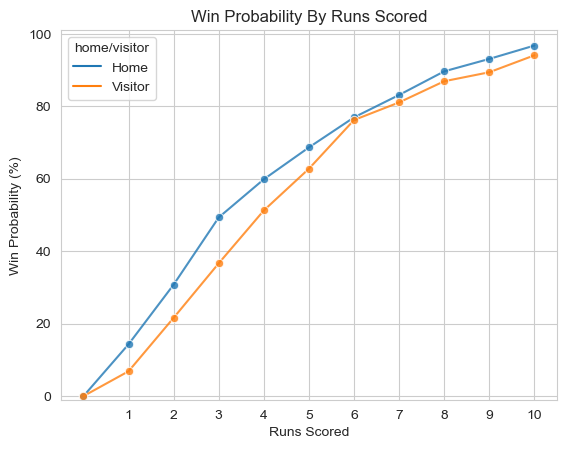

In [89]:
sns.set_style('whitegrid')

fig = sns.lineplot(data = display, x = 'runs', y = 'win', hue = 'home/visitor',
                  alpha = 0.8, marker = 'o').set(title = 'Win Probability By Runs Scored',
                                                xlabel = 'Runs Scored',
                                                ylabel = 'Win Probability (%)',
                                                ylim = [-1, 101],
                                                xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);

As the visualization above demonstrates, the probability of winning given x runs increases as x increases.  There is a slight disadvantage to being the home team - the probability of winning for the home team is greater than the visitor for the same number of runs.